<a href="https://colab.research.google.com/github/Samridhk03/IRIS_Flower_Classification/blob/main/IRIS_Flower_Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Iris flower data set is a specific set of information compiled by Ronald Fisher, a biologist, in the 1930s. It describes particular biological characteristics of various types of Iris flowers, specifically, the length and width of both pedals and the sepals, which are part of the flower’s reproductive system

The data contains the following columns:
1.   SepalLengthCm - Shows the Sepal Length in centimeters
2.   SepalWidthCm  - Shows the Sepal Width in centimeters
3.   PetalLengthCm - Shows the Petal Length in centimeters
4.   PetalWidthCm  - Shows the Petal Width in centimeters
5.   Species       - Shows the various Species based on the featues given

In [1]:
#Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Loading Dataset**

In [33]:
#Load the dataset
df = pd.read_csv("/content/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
df = df.drop(['Id'],axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#**2. Quick dataset summary**

In [35]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **3. Data Visualisation**

1.   Data Visualisation
2.   Data Preprocesing

1. Data Visualisation

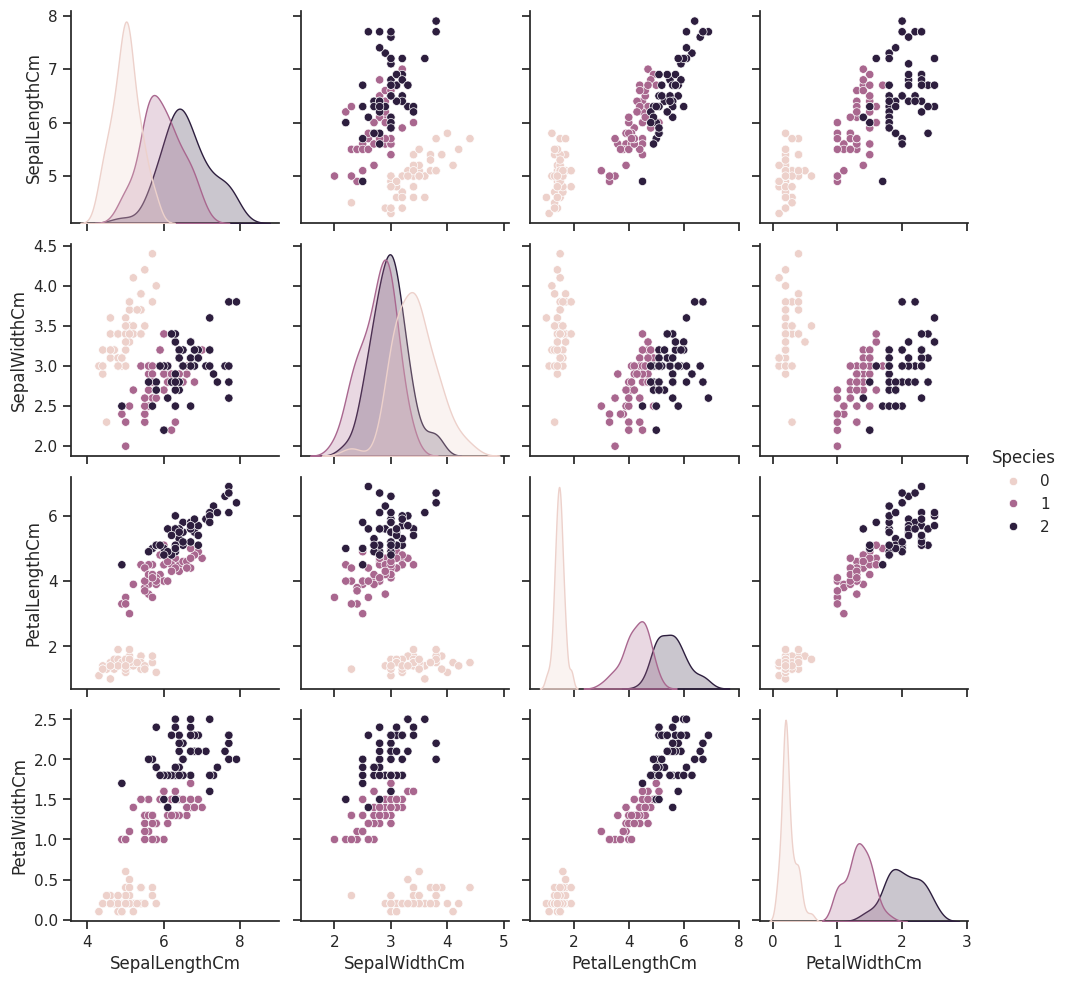

In [73]:
sns.pairplot(df, hue = 'Species')

In the above scatter plot, we can see PetalWidthCm and PetalLengthCm has the strongest pari-wise relationship for classification. Each class are separated clearly for the pair-wise scatter plot between PetalWidthCm and PetalLengthCm

Text(0.5, 1.0, 'Flower class distribution')

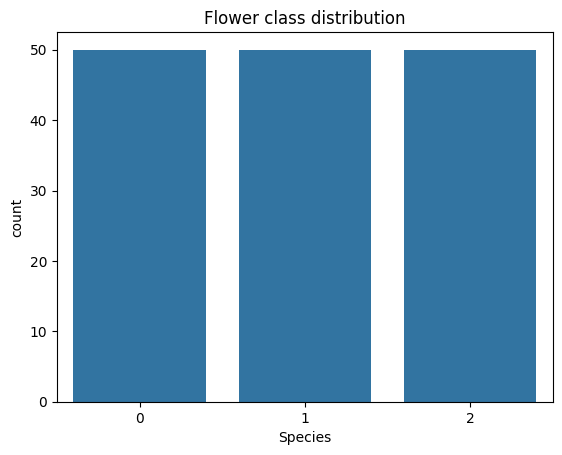

In [55]:
sns.countplot(x = df['Species'])
plt.title('Flower class distribution')

From the above visualization and the summary, we can see each class has equal distribution in the dataset. It's very "ideal" in machine learning project.¶

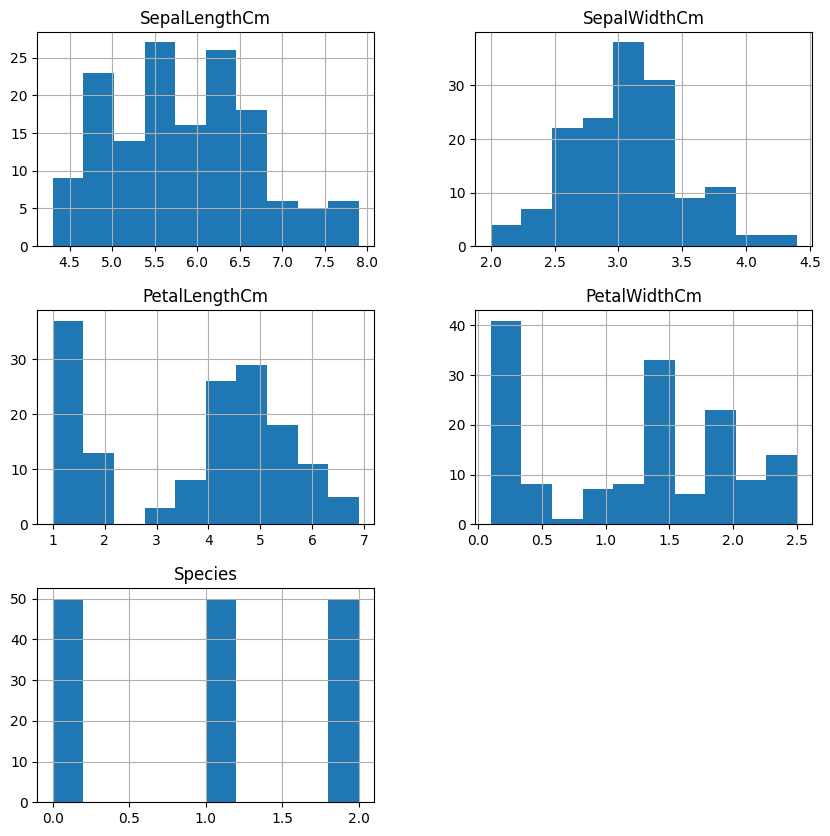

In [56]:
df.hist(figsize=(10, 10))
plt.show()

From the above Box and Whisker plot and histogram, they show 2 of the attirbutes has normal distribution. This is the assumption for many machine learning algorithms. We can utilize the distribution to model our data

2. Data Preprocessing

In [57]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [59]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [60]:
corr = df.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

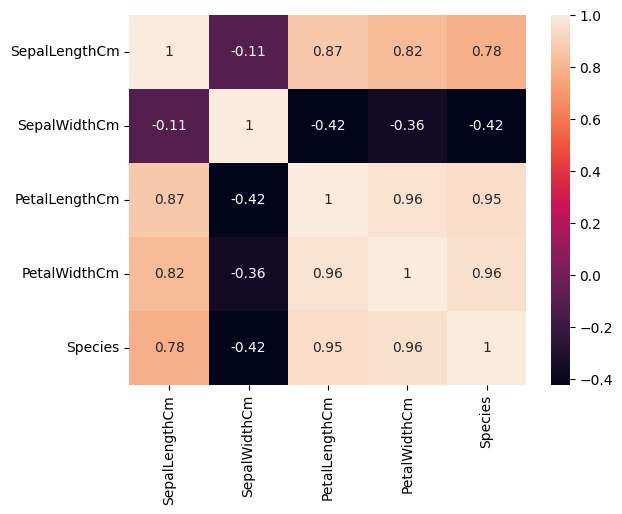

In [61]:
sns.heatmap(corr, annot = True)

# **4. Data Modeling**

Classification problem: our goal is to predict the flow 'Species' with given 4 features: 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', and 'PetalWidthCm'.

4.1 Train-Test Split:

We will use Sklean to Split arrays or matrices into random train and test subsets for training and testing machine learning model.

Our X will be the features of the flowers and Y will be the label of the flowers

In [62]:
x = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

4.2 Model Fitting

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

4.3 Model Prediction

In [65]:
y_pred = knn.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

4.4 Model Result

In [66]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [67]:
print(accuracy_score(y_pred,y_test))

1.0


In [68]:
cnn = confusion_matrix(y_pred,y_test)
cnn

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

4.5 Model Visualisation

<Axes: >

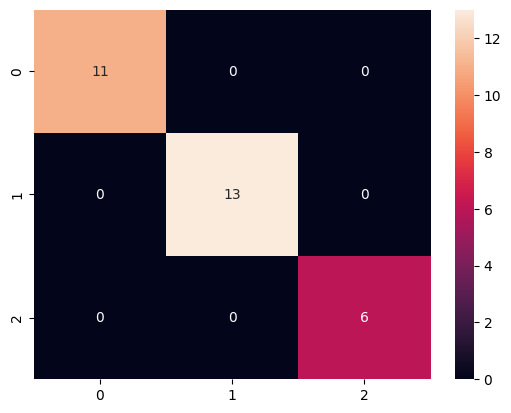

In [69]:
sns.heatmap(cnn, annot = True)